In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
metrics = {}

In [3]:
model_type = "sam2.1"
# model_type = "nnInteractive"

# mode = "bmp2d_masks_directly"
mode = "baseline_vanilla" # vanilla weights (gt bboxes)
# prompt_type = "median"

# contains "baseline" --> ground-truth bboxes

# mode = "baseline" # with finetuned weights though (gt bboxes)
# mode = "bmp2d" # derive bboxes from masks
# mode = "biomedparse_original" # derive bboxes from masks

# prompt = "mask"
prompt = "bbox"

if model_type == "sam2.1":
    prompt_type = "maximum"
elif model_type == "nnInteractive":
    prompt_type = "max"

# prompt_type = "all"

is_tsm = False


In [4]:
if model_type == "sam2.1":
    if mode == "baseline":
        if prompt_type == "all":
            for group in range(3):
                with open(f"/data/scratch/erubel/external_val/utc/experiments/sam2.1/baseline_finetuned/baseline{group}/metrics_baseline{group}.json") as f:
                    metrics |= json.load(f)
        else:
            for group in range(3 if "median" else 4):
                with open(f"/data/scratch/erubel/external_val/utc/experiments/sam2.1/baseline_{prompt_type}/group_{group}/metrics_baseline_{prompt_type}.json") as f:
                    metrics |= json.load(f)

    elif mode == "baseline_vanilla":
        # for group in range(4):
        for group in range(1):
            with open(f"/data/scratch/erubel/external_val/utc/experiments/sam2.1/baseline_vanilla_no_windowing/group{group}/metrics_baseline_vanilla_no_windowing.json") as f:
                metrics |= json.load(f)
        
    elif "bmp2d" in mode:
        if prompt_type == "all":
            with open("/data/scratch/erubel/external_val/utc/experiments/sam2.1/bmp2d_bboxes_experiment_1/metrics_reverse.json") as f:
                metrics = json.load(f)
        elif prompt_type in {"median", "maximum"}:
            for group in range(3 if "median" else 4):
                with open(f"/data/scratch/erubel/external_val/utc/experiments/sam2.1/bmp2d_{prompt_type}/group_{group}/metrics_bmp2d_{prompt_type}.json") as f:
                    metrics |= json.load(f)
elif model_type == "nnInteractive":
    if is_tsm:
        with open(f"/data/scratch/erubel/external_val/utc/experiments/nnInteractive/tsm_25dfb675_nn_all_mask_min_1/group_0/metrics_tsm_25dfb675_nn_all_mask_min_1.json") as f:
                metrics |= json.load(f)
    else:
        for group in range(2):
            try:
                with open(f"/data/scratch/erubel/external_val/utc/experiments/nnInteractive/{mode}_nn_{prompt_type}_{prompt}/group_{group}/metrics_{mode}_nn_{prompt_type}_{prompt}.json") as f:
                    metrics |= json.load(f)
            except FileNotFoundError:
                continue

In [5]:
# is_tsm = False

# # for group in range(4):
# #     with open(f"/data/scratch/erubel/external_val/utc/experiments/nnInteractive/biomedparse_original_with_lung_range/group_{group}/metrics_biomedparse_original_with_lung_range.json") as f:
# #         metrics |= json.load(f)


# if is_tsm:
#     with open("/data/scratch/erubel/external_val/utc/experiments/nnInteractive/tsm_25dfb675_all_mask_with_lung_range/group_0/metrics_tsm_25dfb675_all_mask_with_lung_range.json") as f:
#         metrics = json.load(f)
# else:
#     for group in range(7):
#         with open(f"/data/scratch/erubel/external_val/utc/experiments/nnInteractive/biomedparse_original_with_lung_range_both_metrics/group_{group}/metrics_biomedparse_original_with_lung_range_both_metrics.json") as f:
#             metrics |= json.load(f)

In [6]:
metrics

{'utc_001': {'scan_wise_dice': 0.20354920238057356,
  'slice_identification': [True, True, True],
  'nodule_identification': [True, True, True],
  'nodule_dices': [0.02228688169378921,
   0.3538979248452694,
   0.5605452111469386],
  'matched_volumes': [{'true_volume': 69.17841428518295,
    'predicted_volume': 5462.6974567472935,
    'true_slice_range': [423, 424, 425],
    'predicted_slice_range': [373,
     374,
     375,
     376,
     377,
     378,
     379,
     380,
     381,
     382,
     383,
     384,
     385,
     386,
     387,
     388,
     389,
     390,
     391,
     392,
     393,
     394,
     395,
     396,
     397,
     398,
     399,
     400,
     401,
     402,
     403,
     404,
     405,
     406,
     407,
     408,
     409,
     410,
     411,
     412,
     413,
     414,
     415,
     416,
     417,
     418,
     419,
     420,
     421,
     422,
     423,
     424,
     425],
    'nodule_id': 1,
    'predicted_nodule_id': 1},
   {'true_volume': 

In [7]:
len(metrics)

374

In [8]:

# subset_ids = ['utc_001',
#  'utc_002',
#  'utc_003',
#  'utc_004',
#  'utc_005',
#  'utc_006',
#  'utc_007',
#  'utc_008',
#  'utc_009',
#  'utc_010',
#  'utc_011',
#  'utc_012',
#  'utc_013',
#  'utc_014',
#  'utc_015',
#  'utc_016',
#  'utc_017',
#  'utc_018',
#  'utc_019',
#  'utc_020',
#  'utc_021',
#  'utc_023',
#  'utc_024',
#  'utc_025',
#  'utc_026',
#  'utc_027',
#  'utc_028',
#  'utc_029',
#  'utc_030',
#  'utc_031',
#  'utc_032',
#  'utc_033',
#  'utc_034',
#  'utc_035',
#  'utc_036',
#  'utc_037',
#  'utc_038',
#  'utc_039',
#  'utc_040',
#  'utc_041',
#  'utc_042',
#  'utc_044',
#  'utc_045',
#  'utc_046',
#  'utc_047',
#  'utc_048',
#  'utc_049',
#  'utc_050',
#  'utc_051',
#  'utc_052',
#  'utc_054',
#  'utc_055',
#  'utc_056',
#  'utc_057',
#  'utc_058',
#  'utc_059',
#  'utc_060',
#  'utc_061',
#  'utc_062',
#  'utc_063',
#  'utc_064',
#  'utc_065',
#  'utc_066',
#  'utc_067',
#  'utc_068',
#  'utc_069',
#  'utc_070',
#  'utc_071',
#  'utc_072',
#  'utc_073',
#  'utc_074',
#  'utc_075',
#  'utc_076',
#  'utc_077',
#  'utc_078',
#  'utc_079',
#  'utc_080',
#  'utc_081',
#  'utc_082',
#  'utc_083',
#  'utc_084',
#  'utc_085',
#  'utc_087',
#  'utc_088',
#  'utc_089',
#  'utc_090',
#  'utc_091',
#  'utc_092',
#  'utc_093',
#  'utc_094',
#  'utc_095',
#  'utc_096',
#  'utc_097',
#  'utc_098',
#  'utc_099',
#  'utc_100',
#  'utc_101',
#  'utc_102',
#  'utc_103',
#  'utc_104',
#  'utc_105',
#  'utc_106',
#  'utc_107',
#  'utc_108',
#  'utc_109',
#  'utc_110',
#  'utc_111',
#  'utc_112',
#  'utc_113',
#  'utc_114',
#  'utc_115',
#  'utc_116',
#  'utc_117',
#  'utc_118',
#  'utc_119',
#  'utc_120',
#  'utc_121',
#  'utc_122',
#  'utc_123',
#  'utc_124',
#  'utc_125',
#  'utc_126',
#  'utc_127',
#  'utc_128',
#  'utc_129',
#  'utc_130',
#  'utc_131',
#  'utc_132',
#  'utc_133',
#  'utc_134',
#  'utc_135',
#  'utc_136',
#  'utc_137',
#  'utc_139',
#  'utc_140',
#  'utc_141',
#  'utc_142',
#  'utc_143',
#  'utc_144',
#  'utc_145',
#  'utc_146',
#  'utc_147',
#  'utc_148',
#  'utc_149',
#  'utc_150',
#  'utc_151',
#  'utc_152',
#  'utc_153',
#  'utc_154',
#  'utc_155',
#  'utc_156',
#  'utc_157',
#  'utc_158',
#  'utc_159',
#  'utc_160',
#  'utc_161',
#  'utc_162',
#  'utc_163',
#  'utc_164',
#  'utc_165',
#  'utc_166',
#  'utc_167',
#  'utc_168',
#  'utc_169',
#  'utc_170',
#  'utc_171',
#  'utc_172',
#  'utc_173',
#  'utc_174',
#  'utc_175',
#  'utc_176',
#  'utc_177',
#  'utc_178',
#  'utc_179',
#  'utc_180',
#  'utc_181',
#  'utc_182',
#  'utc_183',
#  'utc_184',
#  'utc_186',
#  'utc_187',
#  'utc_188',
#  'utc_189',
#  'utc_190',
#  'utc_191',
#  'utc_192',
#  'utc_193',
#  'utc_194',
#  'utc_195',
#  'utc_196',
#  'utc_197',
#  'utc_198',
#  'utc_199',
#  'utc_200',
#  'utc_201',
#  'utc_202',
#  'utc_203',
#  'utc_204',
#  'utc_205',
#  'utc_206',
#  'utc_207',
#  'utc_208',
#  'utc_209',
#  'utc_210',
#  'utc_211',
#  'utc_212',
#  'utc_213',
#  'utc_214',
#  'utc_215',
#  'utc_216',
#  'utc_217',
#  'utc_218',
#  'utc_219',
#  'utc_220',
#  'utc_221',
#  'utc_222',
#  'utc_223',
#  'utc_224',
#  'utc_225',
#  'utc_226',
#  'utc_227',
#  'utc_228',
#  'utc_229',
#  'utc_230',
#  'utc_231',
#  'utc_232',
#  'utc_233',
#  'utc_234',
#  'utc_235',
#  'utc_236',
#  'utc_237',
#  'utc_238',
#  'utc_239',
#  'utc_240',
#  'utc_242',
#  'utc_243',
#  'utc_244',
#  'utc_245',
#  'utc_246',
#  'utc_247',
#  'utc_248',
#  'utc_250',
#  'utc_251',
#  'utc_252',
#  'utc_254',
#  'utc_255',
#  'utc_256',
#  'utc_257',
#  'utc_258',
#  'utc_259',
#  'utc_260',
#  'utc_261',
#  'utc_262',
#  'utc_263',
#  'utc_264',
#  'utc_265',
#  'utc_266',
#  'utc_267',
#  'utc_268',
#  'utc_269',
#  'utc_270',
#  'utc_271',
#  'utc_272',
#  'utc_273',
#  'utc_274',
#  'utc_275',
#  'utc_276',
#  'utc_277',
#  'utc_278',
#  'utc_279',
#  'utc_280',
#  'utc_281',
#  'utc_282',
#  'utc_283',
#  'utc_284',
#  'utc_285',
#  'utc_286',
#  'utc_287',
#  'utc_289',
#  'utc_290',
#  'utc_291',
#  'utc_292',
#  'utc_293',
#  'utc_294',
#  'utc_295',
#  'utc_296',
#  'utc_297',
#  'utc_298',
#  'utc_299',
#  'utc_300',
#  'utc_301',
#  'utc_302',
#  'utc_303',
#  'utc_304',
#  'utc_306',
#  'utc_307',
#  'utc_308',
#  'utc_309',
#  'utc_310',
#  'utc_311',
#  'utc_312',
#  'utc_313',
#  'utc_314',
#  'utc_315',
#  'utc_316',
#  'utc_317',
#  'utc_318',
#  'utc_319',
#  'utc_320',
#  'utc_321',
#  'utc_322',
#  'utc_324',
#  'utc_325',
#  'utc_326',
#  'utc_327',
#  'utc_328',
#  'utc_329',
#  'utc_330',
#  'utc_331',
#  'utc_332',
#  'utc_333',
#  'utc_334',
#  'utc_335',
#  'utc_336',
#  'utc_337',
#  'utc_338',
#  'utc_339',
#  'utc_340',
#  'utc_341',
#  'utc_342',
#  'utc_343',
#  'utc_344',
#  'utc_345',
#  'utc_347',
#  'utc_348',
#  'utc_350',
#  'utc_352',
#  'utc_353',
#  'utc_354',
#  'utc_355',
#  'utc_356',
#  'utc_357',
#  'utc_359',
#  'utc_360',
#  'utc_361',
#  'utc_362',
#  'utc_363',
#  'utc_364',
#  'utc_365',
#  'utc_366',
#  'utc_367',
#  'utc_368',
#  'utc_369',
#  'utc_370',
#  'utc_371',
#  'utc_372',
#  'utc_373',
#  'utc_374',
#  'utc_375',
#  'utc_376',
#  'utc_377',
#  'utc_378',
#  'utc_379',
#  'utc_380',
#  'utc_381',
#  'utc_382',
#  'utc_383',
#  'utc_384',
#  'utc_386',
#  'utc_387',
#  'utc_388',
#  'utc_389',
#  'utc_390',
#  'utc_391',
#  'utc_392',
#  'utc_393',
#  'utc_394',
#  'utc_395',
#  'utc_396',
#  'utc_397',
#  'utc_398',
#  'utc_399',
#  'utc_400',
#  'utc_401',
#  'utc_402',
#  'utc_403',
#  'utc_404',
#  'utc_405',
#  'utc_406',
#  'utc_407',
#  'utc_408',
#  'utc_409',
#  'utc_410',
#  'utc_411',
#  'utc_412',
#  'utc_413',
#  'utc_414',
#  'utc_415',
#  'utc_416',
#  'utc_418',
#  'utc_419',
#  'utc_420',
#  'utc_421',
#  'utc_422',
#  'utc_423',
#  'utc_424',
#  'utc_425',
#  'utc_426',
#  'utc_427',
#  'utc_428',
#  'utc_429',
#  'utc_430',
#  'utc_431',
#  'utc_432',
#  'utc_433',
#  'utc_434',
#  'utc_435',
#  'utc_436',
#  'utc_437',
#  'utc_438',
#  'utc_439',
#  'utc_440',
#  'utc_441',
#  'utc_442',
#  'utc_443',
#  'utc_444',
#  'utc_445',
#  'utc_446',
#  'utc_447',
#  'utc_448',
#  'utc_449',
#  'utc_450',
#  'utc_451',
#  'utc_452',
#  'utc_453',
#  'utc_454',
#  'utc_455',
#  'utc_456',
#  'utc_457',
#  'utc_458',
#  'utc_459',
#  'utc_460',
#  'utc_461',
#  'utc_462',
#  'utc_463',
#  'utc_464',
#  'utc_465',
#  'utc_466',
#  'utc_467',
#  'utc_468',
#  'utc_469',
#  'utc_470',
#  'utc_471',
#  'utc_472',
#  'utc_473',
#  'utc_474',
#  'utc_475',
#  'utc_476',
#  'utc_477',
#  'utc_478',
#  'utc_479',
#  'utc_480',
#  'utc_481',
#  'utc_482',
#  'utc_483',
#  'utc_484',
#  'utc_485',
#  'utc_486',
#  'utc_487',
#  'utc_488',
#  'utc_490',
#  'utc_491',
#  'utc_492',
#  'utc_493',
#  'utc_494',
#  'utc_495',
#  'utc_496',
#  'utc_497',
#  'utc_498',
#  'utc_499',
#  'utc_500',
#  'utc_501',
#  'utc_502',
#  'utc_503',
#  'utc_504',
#  'utc_505',
#  'utc_506',
#  'utc_507',
#  'utc_508',
#  'utc_509',
#  'utc_510',
#  'utc_511',
#  'utc_512',
#  'utc_513',
#  'utc_514',
#  'utc_515',
#  'utc_516',
#  'utc_517',
#  'utc_518',
#  'utc_519',
#  'utc_520',
#  'utc_521',
#  'utc_522',
#  'utc_523',
#  'utc_524',
#  'utc_525',
#  'utc_526',
#  'utc_527',
#  'utc_528',
#  'utc_529',
#  'utc_530',
#  'utc_531',
#  'utc_532',
#  'utc_533',
#  'utc_534',
#  'utc_535',
#  'utc_536',
#  'utc_537',
#  'utc_538',
#  'utc_539',
#  'utc_540',
#  'utc_541',
#  'utc_542',
#  'utc_543',
#  'utc_544',
#  'utc_545',
#  'utc_546',
#  'utc_547',
#  'utc_548',
#  'utc_549']

In [9]:
# input("Using the subset!")

# metrics = {k:v for k, v in metrics.items() if k in subset_ids}

In [10]:
sam2_nodule_dice = []
sam2_scan_dice = []

original_nodule_dice = []
original_scan_dice = []

for series_id in metrics:
    if "baseline" in mode:
        sam2_nodule_dice.extend(metrics[series_id]["nodule_dices"])
        sam2_scan_dice.append(metrics[series_id]["scan_wise_dice"])
    elif mode == "bmp2d" or "biomedparse" in mode:
        sam2_nodule_dice.extend(metrics[series_id][model_type]["nodule_dices"])
        sam2_scan_dice.append(metrics[series_id][model_type]["scan_wise_dice"])

        if not is_tsm:
            original_nodule_dice.extend(metrics[series_id]["original"]["nodule_dices"])
            original_scan_dice.append(metrics[series_id]["original"]["scan_wise_dice"])
    elif mode == "bmp2d_masks_directly":
        sam2_nodule_dice.extend(metrics[series_id]["original"]["nodule_dices"])
        sam2_scan_dice.append(metrics[series_id]["original"]["scan_wise_dice"])

In [11]:
sam2_nodule_dice

[0.02228688169378921,
 0.3538979248452694,
 0.5605452111469386,
 0.5884662576679897,
 0.791680990030258,
 0.6333333333182539,
 0.021337691355971907,
 0.5108086469134443,
 0.8379213896652157,
 0.5610859728252902,
 0.5319148936089375,
 0.6987951806948275,
 0.506131549604168,
 0.6901217861882257,
 0.7728337236352966,
 0.7636363636016529,
 0.269662921344948,
 0.3349072142304437,
 0.7914164164159212,
 0.795204795196851,
 0.4854014598451569,
 0.417475728135074,
 0.17313432835304077,
 0.33050847456226656,
 0.5520661156933543,
 0.26506024095746844,
 0.6386554621312055,
 0.5079365078961955,
 0.48175182478235384,
 0.1928460342116198,
 0.6571428570489797,
 0.33333333331541215,
 0.6331658291139113,
 0.692307692218935,
 0.4210526315567867,
 0.24783861670755508,
 0.15967523680433457,
 0.3018181818126942,
 0.41314553988670677,
 0.3749999999707031,
 0.05009633911335841,
 0.326530612222685,
 0.2650602409319205,
 0.5426356588726639,
 0.2817869415710726,
 0.49523809519092976,
 0.40645161289011444,
 0.285

In [12]:
def plot_histogram(values, bins=50, title='Histogram', xlabel='Value', ylabel='Frequency'):
    mean_value = np.mean(values)
    median_value = np.median(values)

    plt.hist(values, bins=np.linspace(0, 1, bins), edgecolor='black', alpha=0.7)
    plt.title(f"{title} [N = {len(values)}]")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    text_str = f'Mean: {mean_value:.4f}\nMedian: {median_value:.4f}'
    plt.text(0.95, 0.95, text_str, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [13]:
len([val for val in sam2_nodule_dice if val == 0])

70

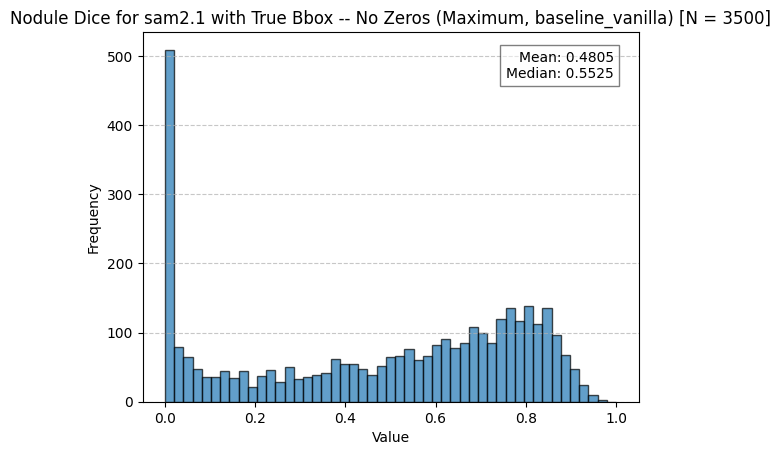

In [14]:
plot_histogram([val for val in sam2_nodule_dice if val > 0], title=f"Nodule Dice for {model_type} with {'True' if 'baseline' in mode else 'BMP2D'} {prompt.title()} -- No Zeros ({prompt_type.title()}, {mode})")

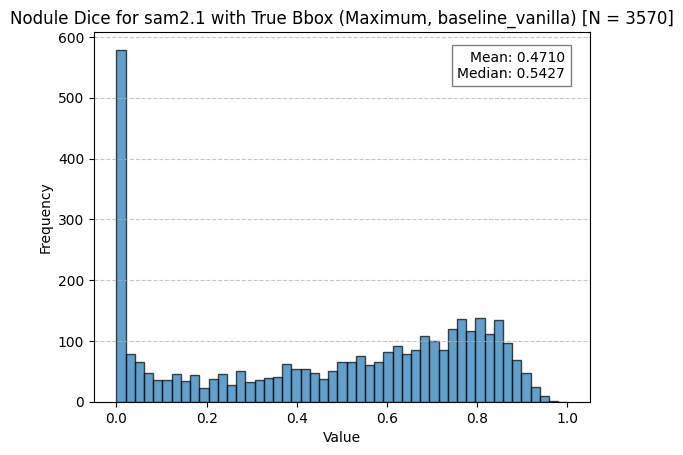

In [15]:
plot_histogram(sam2_nodule_dice, title=f"Nodule Dice for {model_type} with {'True' if 'baseline' in mode else 'BMP2D'} {prompt.title()} ({prompt_type.title()}, {mode})")

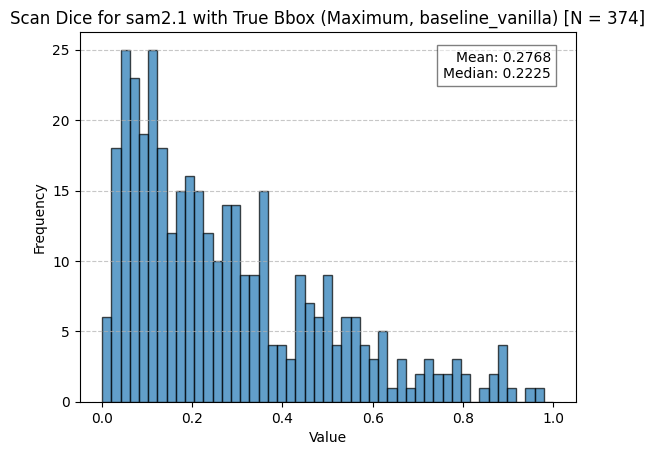

In [16]:
plot_histogram(sam2_scan_dice, title=f"Scan Dice for {model_type} with {'True' if 'baseline' in mode else 'BMP2D'} {prompt.title()} ({prompt_type.title()}, {mode})")

In [17]:
if mode == "bmp2d" or mode == "biomedparse_original":
    plot_histogram([val for val in original_nodule_dice if val > 0], title=f"Original Nodule Dice from BMP2D -- No Zeros")
    plot_histogram(original_nodule_dice, title=f"Original Nodule Dice from BMP2D")
    plot_histogram(original_scan_dice, title=f"Original Scan Dice from BMP2D")

In [18]:
num_true_nodules = 0
for pid, pid_entry in metrics.items():
    if model_type == "sam2.1":
        num_true_nodules += len(pid_entry["nodule_identification"])
    elif model_type == "nnInteractive":
        num_true_nodules += len(pid_entry[model_type]["nodule_identification"])
num_true_nodules

3570

In [19]:
# assuming we have N = 6831 true nodules (from analysis with "all")

# print(f"Nodule Recall: {len([val for val in sam2_nodule_dice if val > 0]) / 6831}")

In [20]:
print(f"Nodule Recall: {len([val for val in sam2_nodule_dice if val > 0]) / num_true_nodules}")

Nodule Recall: 0.9803921568627451
